In [235]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = "../data/kvadrati2/kvadrati.csv"
kvadrati_df = pd.read_csv(csv_file, encoding="utf-8")
kvadrati_df.head()

,id,naslov,latitude,longitude,vrsta_prodaje,vrsta,tip,velikost,leto_gradnje,cena,prodajalec_oseba,prodajalec_agencija,splosno,znacilnosti,opis,url
0,1,"Notranjsko - kraška, Ilirska Bistrica, Hrušica",45.846179,14.230267,Prodaja,Parcela,Zazidljiva,4194 m2,NaN,37.000 €,Nina Hudnik,RONI NEPREMIČNINE d.o.o.,Šifra:=PP397815031525,NaN,Iščete primerno zemljišče za gradnjo ali inves...,https://mojikvadrati.com/nepremicnina/467410-p...
1,2,"Pomurska, Murska Sobota",46.662464,16.165526,Prodaja,Parcela,Zazidljiva,1898 m2,NaN,40 €/m2,Rajko Šimonka,Prips nepremičnine d.o.o.,Šifra:=P26-2022,NaN,Nedaleč od trgovskega središča prodamo zemljiš...,https://mojikvadrati.com/nepremicnina/373458-p...
2,3,"Podravska, Destrnik, Vintarovci",46.495602,15.864561,Prodaja,Parcela,Zazidljiva,646 m2,NaN,23.500 €,Melanija Raišp,CENTURY 21 Slovenija,Šifra:=100104-589,Lega=Jug/Zahod|Luksuz=Lep razgled/Bližina nara...,"ZEMLJIŠČE V VINTAROVCIH, DESTRNIKProdamo zemlj...",https://mojikvadrati.com/nepremicnina/453310-p...
3,4,"Goriška, Kanal ob Soči, Doblar",46.115738,13.687290,Prodaja,Hiša,Samostojna,223.6 m2,1924.0,110.000 €,Jure Repše,RENES d.o.o.,Parcela:=17967 m2|Zgrajeno:=1924|Ener. izk.=G|...,Dodatno=Balkon/Atrij/Terasa,DOBLARSamostojna stanovanjska hiša velikosti 2...,https://mojikvadrati.com/nepremicnina/424445-p...
4,5,"Podravska, Maribor, Pekre",46.543337,15.592553,Prodaja,Hiša,Večstanovanjska,322.6 m2,1973.0,579.000 €,Barbara Pečenik,BAZA AGENCIJA d.o.o.,Velikost (bruto):=322.6 m2|Parcela:=535 m2|Št....,Ogrevanje=Toplotna črpalka|Luksuz=Klima/Lep ra...,Na odlični in mirni lokaciji v Pekrah prodamo ...,https://mojikvadrati.com/nepremicnina/469054-p...


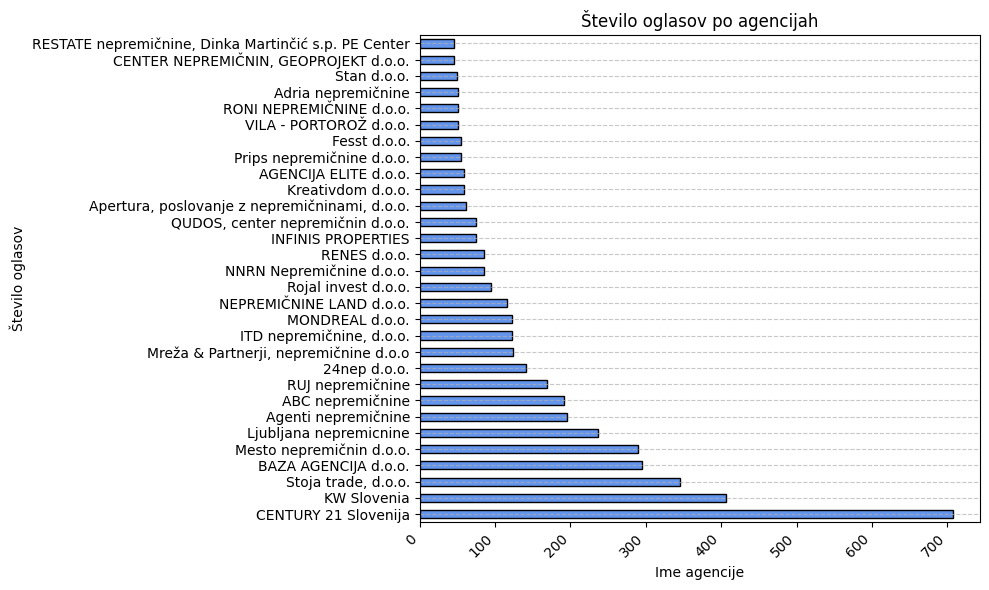

In [236]:
counts = kvadrati_df['prodajalec_agencija'].value_counts()
counts = counts[counts >= 45]

# # Nariši stolpični diagram
plt.figure(figsize=(10, 6))
counts.plot(kind='barh', color='cornflowerblue', edgecolor='black', )

plt.title('Število oglasov po agencijah')
plt.xlabel('Ime agencije')
plt.ylabel('Število oglasov')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


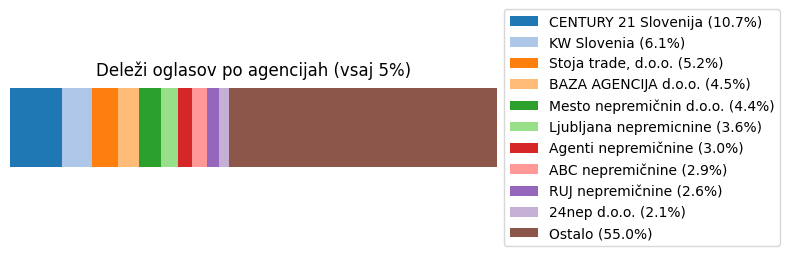

In [237]:
import matplotlib.pyplot as plt

# Preštej vrednosti
counts = kvadrati_df['prodajalec_agencija'].value_counts()

# Pretvori v deleže
proportions = counts / counts.sum()

# Agencije >= 5%
main_agencije = proportions[proportions >= 0.02]

# Združi ostale
ostalo = proportions[proportions < 0.02].sum()

# Dodaj 'Ostalo' k rezultatu
stack_data = main_agencije.copy()
stack_data['Ostalo'] = ostalo

# Pripravimo barve
colors = plt.cm.tab20.colors

# Pripravimo sliko
fig, ax = plt.subplots(figsize=(8, 2))  # Visok 1 stolpec

# Nariši "stolpec po stolpec"
left = 0
for i, (label, value) in enumerate(stack_data.items()):
    ax.barh(y=0, width=value, left=left, color=colors[i % len(colors)], label=f'{label} ({value:.1%})')
    left += value  # zamik za naslednji segment

# Stilizacija
ax.set_xlim(0, 1)
ax.set_title('Deleži oglasov po agencijah (vsaj 5%)')
ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [238]:
import numpy as np

def get_velikost(v):
    split_v = str(v).split()
    try:
        return float(split_v[0].replace(',', '.'))
    except ValueError:
        return None

def get_cena(c):
    c = str(c).split('€')[0].split('EUR')[0].replace('.', '').replace(',', '.').strip()

    try:
        return float(c)
    except ValueError:
        return None

def očisti_ceno(cena_str, velikost):
    if pd.isna(cena_str):
        return np.nan
    cena_str = str(cena_str).lower().replace("€", "").replace("€", "").replace(".", "").strip()
    
    try:
        if "m2" in cena_str:
            vrednost_na_m2 = float(cena_str.replace("m2", "").strip())
            return vrednost_na_m2 * velikost
        else:
            return float(cena_str)
    except:
        return np.nan

In [239]:
kvadrati_df['velikost_clean'] = kvadrati_df['velikost'].apply(get_velikost)
kvadrati_df['cena_clean'] = kvadrati_df.apply(lambda row: očisti_ceno(row['cena'], row['velikost']), axis=1)
kvadrati_df['cena_na_m2'] = kvadrati_df['cena_clean'] / kvadrati_df['velikost_clean']

kvadrati_cene = kvadrati_df[(kvadrati_df['cena_na_m2'].notnull()) & (kvadrati_df['cena_na_m2'] < 15000) & (kvadrati_df['cena_na_m2'] > 50)]
kvadrati_cene

,id,naslov,latitude,longitude,vrsta_prodaje,vrsta,tip,velikost,leto_gradnje,cena,prodajalec_oseba,prodajalec_agencija,splosno,znacilnosti,opis,url,velikost_clean,cena_clean,cena_na_m2
3,4,"Goriška, Kanal ob Soči, Doblar",46.115738,13.687290,Prodaja,Hiša,Samostojna,223.6 m2,1924.0,110.000 €,Jure Repše,RENES d.o.o.,Parcela:=17967 m2|Zgrajeno:=1924|Ener. izk.=G|...,Dodatno=Balkon/Atrij/Terasa,DOBLARSamostojna stanovanjska hiša velikosti 2...,https://mojikvadrati.com/nepremicnina/424445-p...,223.60,110000.0,491.949911
4,5,"Podravska, Maribor, Pekre",46.543337,15.592553,Prodaja,Hiša,Večstanovanjska,322.6 m2,1973.0,579.000 €,Barbara Pečenik,BAZA AGENCIJA d.o.o.,Velikost (bruto):=322.6 m2|Parcela:=535 m2|Št....,Ogrevanje=Toplotna črpalka|Luksuz=Klima/Lep ra...,Na odlični in mirni lokaciji v Pekrah prodamo ...,https://mojikvadrati.com/nepremicnina/469054-p...,322.60,579000.0,1794.792312
6,7,"Ljubljana okolica, Velike Lašče",45.832469,14.638310,Prodaja,Parcela,Zazidljiva,925 m2,NaN,110.000 €,NaN,Bamba nepremičnine Tanko Franc s.p.,NaN,NaN,"VELIKE LAŠČEVELIKE LAŠČE- center, prodamo stav...",https://mojikvadrati.com/nepremicnina/469046-p...,925.00,110000.0,118.918919
7,8,"Ljubljana okolica, Škofljica",45.985384,14.572855,Prodaja,Hiša,Samostojna,142 m2,2024.0,585.000 €,Rojal invest d.o.o.,Rojal invest d.o.o.,Velikost (bruto):=142 m2|Parcela:=599 m2|Zgraj...,NaN,ŠKOFLJICA – NOVOGRADNJA – SAMOSTOJNE HIŠEŠKOFL...,https://mojikvadrati.com/nepremicnina/449826-p...,142.00,585000.0,4119.718310
8,9,"Ljubljana, Vič-Rudnik, Trnovo",43.672248,18.448815,Prodaja,Hiša,Dvojček,217 m2,2020.0,864.000 €,NIKO MAUČEC,Mesto nepremičnin d.o.o.,Velikost (neto):=217 m2|Velikost (bruto):=217 ...,Dodatno=Vrt/Terasa/Pokrito parkirišče|Priključ...,"Hiša dvojček v Trnovskem predmestju(P+1, novog...",https://mojikvadrati.com/nepremicnina/247131-p...,217.00,864000.0,3981.566820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,6792,"Ljubljana, Šiška",46.073720,14.485868,Prodaja,Stanovanje,4-sobno,93.1 m2,1983.0,398.000 €,Urška Hočevar,Stan d.o.o.,Velikost (bruto):=93.1 m2|Zgrajeno:=1983|Adapt...,Dodatno=Dvigalo/Balkon/Parkirišče,"LJ. ŠIŠKA, DRAVLJE, BLIŽINA ZELENIH POVRŠINide...",https://mojikvadrati.com/nepremicnina/482910-p...,93.10,398000.0,4274.973147
6776,6793,"Ljubljana, Vič-Rudnik, Rudnik",50.444777,22.244033,Prodaja,Stanovanje,4-sobno,97.2 m2,2020.0,470.000 €,Rojal invest d.o.o.,Rojal invest d.o.o.,Velikost (bruto):=97.2 m2|Nadstropje:=1|Zgraje...,Dodatno=Balkon/Dvigalo,"Ljubljana, Peruzzijeva ulica –Vila Bober, stan...",https://mojikvadrati.com/nepremicnina/482529-p...,97.20,470000.0,4835.390947
6777,6794,Umag,45.432359,13.522410,Prodaja,Stanovanje,2-sobno,65 m2,2019.0,235.000 €,Sara Ducman,INFINIS PROPERTIES,Velikost (bruto):=65 m2|Nadstropje:=Pritličje|...,Ogrevanje=Toplotna črpalka/Talno gretje|Luksuz...,Prodamo čudovito 2-sobno stanovanje v luksuzne...,https://mojikvadrati.com/nepremicnina/473926-p...,65.00,235000.0,3615.384615
6778,6795,"Goriška, Idrija",46.002398,14.027301,Prodaja,Poslovni prostor,Neživilska trgovina,309.13 m2,1980.0,300.000 €,Marko Udovč,REVESTUM d.o.o.,Velikost (bruto):=309.13 m2|Nadstropje:=Pritli...,Ogrevanje=Toplotna črpalka,Poslovni prostor - prodajalna v IdrijiPoslovni...,https://mojikvadrati.com/nepremicnina/472166-p...,309.13,300000.0,970.465500


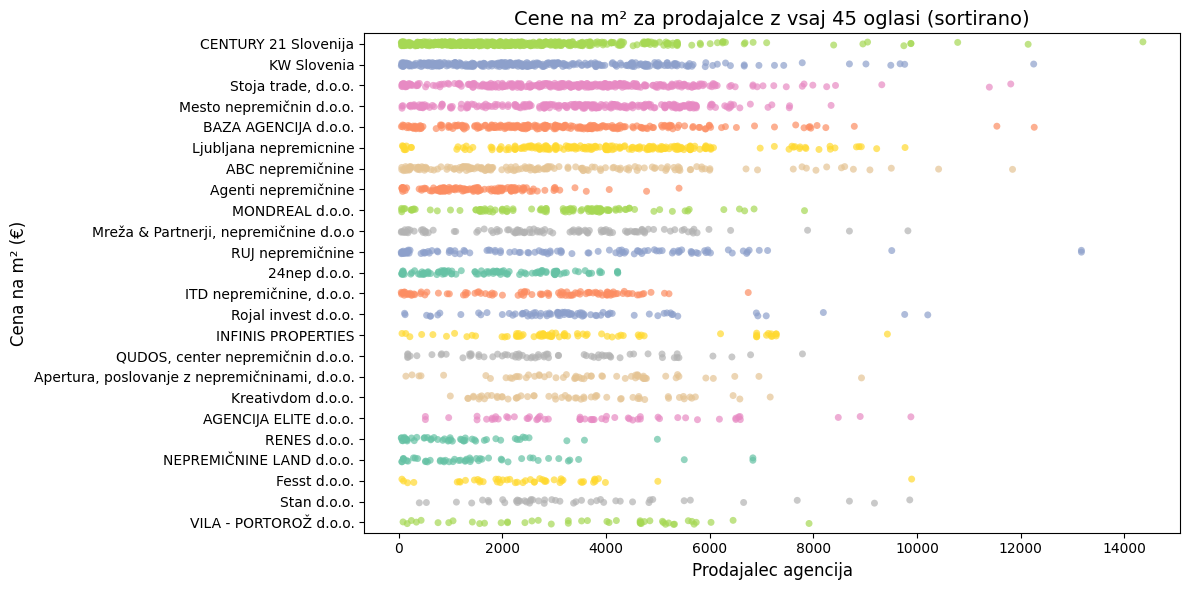

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = kvadrati_cene['prodajalec_agencija'].value_counts()

# Izberi samo agencije z vsaj 45 vrsticami
valid_agencies = counts[counts >= 45].sort_values().index

# Filtriraj DataFrame, da vsebuje le validne agencije
filtered_df = kvadrati_cene[kvadrati_cene['prodajalec_agencija'].isin(valid_agencies)]

ordered_agencies = counts[counts >= 45].sort_values(ascending=False).index

# Ustvari scatter plot za filtrirane in sortirane agencije
plt.figure(figsize=(12, 6))

sns.stripplot(
    data=filtered_df,
    y='prodajalec_agencija',
    x='cena_na_m2',
    order=ordered_agencies,
    alpha=0.7,
    hue='prodajalec_agencija',
    palette='Set2', 
    legend=None
)
plt.title('Cene na m² za prodajalce z vsaj 45 oglasi (sortirano)', fontsize=14)
plt.xlabel('Prodajalec agencija', fontsize=12)
plt.ylabel('Cena na m² (€)', fontsize=12)
plt.tight_layout()

plt.show()


Ljubljana nepremičnine ima veliko nepremičnin okoli 8000 e/m2.

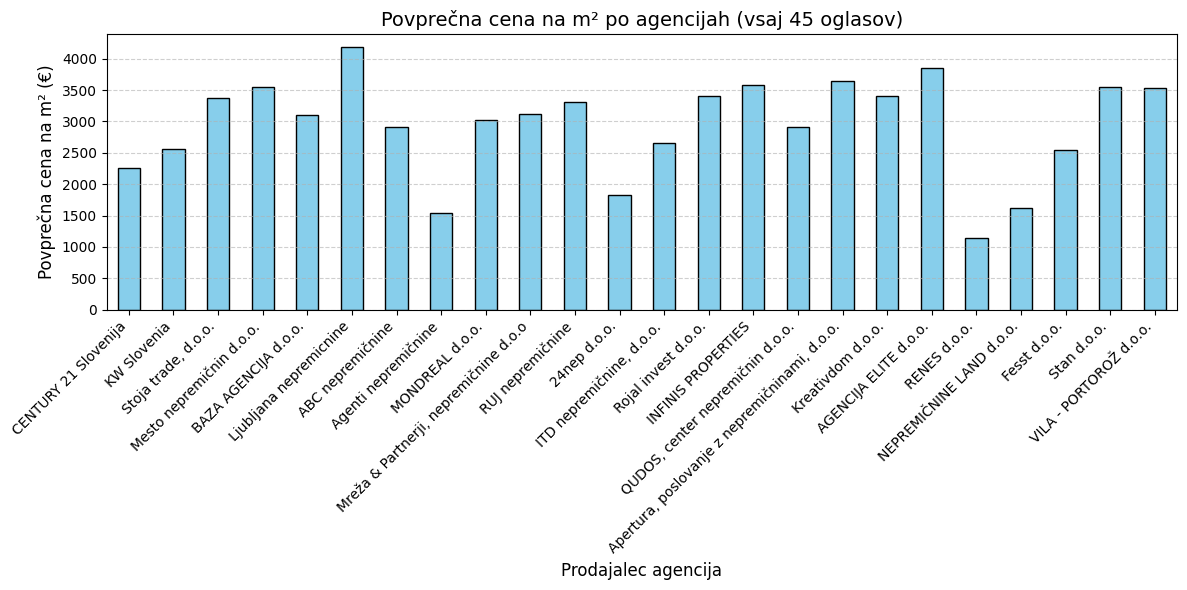

In [211]:
avg_price_per_agency = filtered_df.groupby('prodajalec_agencija')['cena_na_m2'].mean()

# Sortiramo po številu oglasov (kot prej)
avg_price_per_agency = avg_price_per_agency.loc[ordered_agencies]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

avg_price_per_agency.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Povprečna cena na m² po agencijah (vsaj 45 oglasov)', fontsize=14)
plt.xlabel('Prodajalec agencija', fontsize=12)
plt.ylabel('Povprečna cena na m² (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Agenti nepremičnine in Renes d.o.o. imajo precej nizke cene. Renes ima veliko parcel in poceni poslovnih prostorov!

Samo hiše/stanovanja.

/var/folders/8m/dfvs5qws4vldqrmk1w928rq80000gn/T/ipykernel_70797/2451812968.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[(kvadrati_cene["vrsta"] == "Stanovanje") | (kvadrati_cene["vrsta"] == "Hiša")]


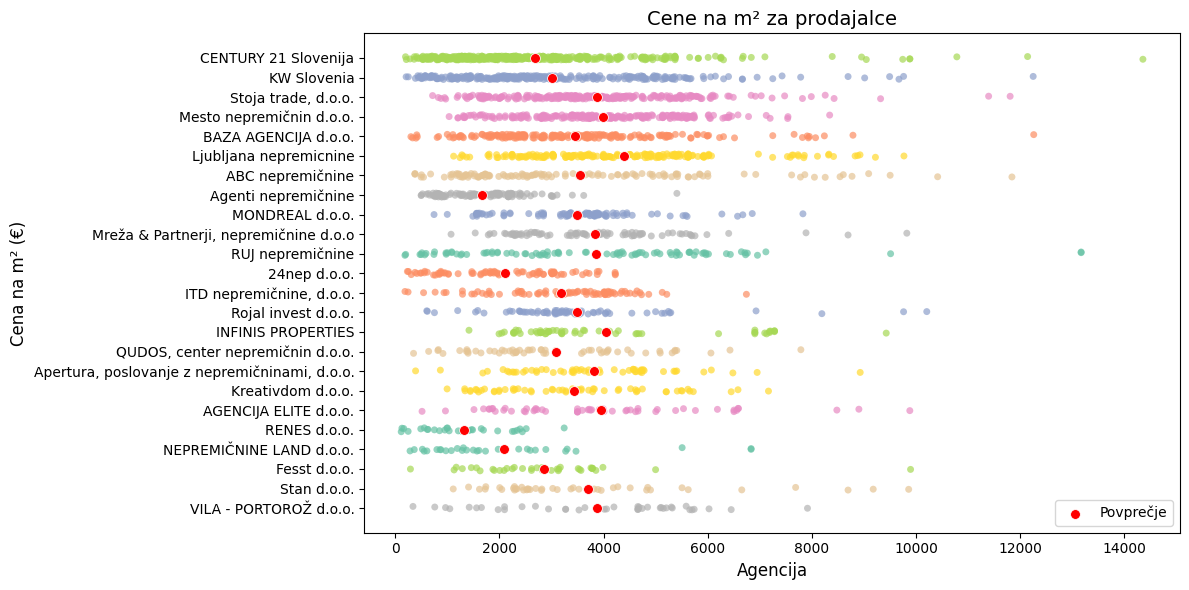

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = kvadrati_cene['prodajalec_agencija'].value_counts()

# Izberi samo agencije z vsaj 45 vrsticami
valid_agencies = counts[counts >= 45].sort_values().index

# Filtriraj DataFrame, da vsebuje le validne agencije
filtered_df = kvadrati_cene[(kvadrati_cene['prodajalec_agencija'].isin(valid_agencies))]
filtered_df = filtered_df[(kvadrati_cene["vrsta"] == "Stanovanje") | (kvadrati_cene["vrsta"] == "Hiša")]

ordered_agencies = counts[counts >= 45].sort_values(ascending=False).index

mean_values = filtered_df.groupby('prodajalec_agencija')['cena_na_m2'].mean().loc[ordered_agencies]


# Ustvari scatter plot za filtrirane in sortirane agencije
plt.figure(figsize=(12, 6))

sns.stripplot(
    data=filtered_df,
    y='prodajalec_agencija',
    x='cena_na_m2',
    order=ordered_agencies,
    alpha=0.7,
    hue='prodajalec_agencija',
    palette='Set2', 
    legend=None
)
sns.scatterplot(
    y=ordered_agencies,
    x=mean_values.values,
    color='r',
    marker='o',
    s=50,
    zorder=10,
    label="Povprečje"
)

plt.title('Cene na m² za prodajalce', fontsize=14)
plt.xlabel('Agencija', fontsize=12)
plt.ylabel('Cena na m² (€)', fontsize=12)
plt.tight_layout()

plt.show()

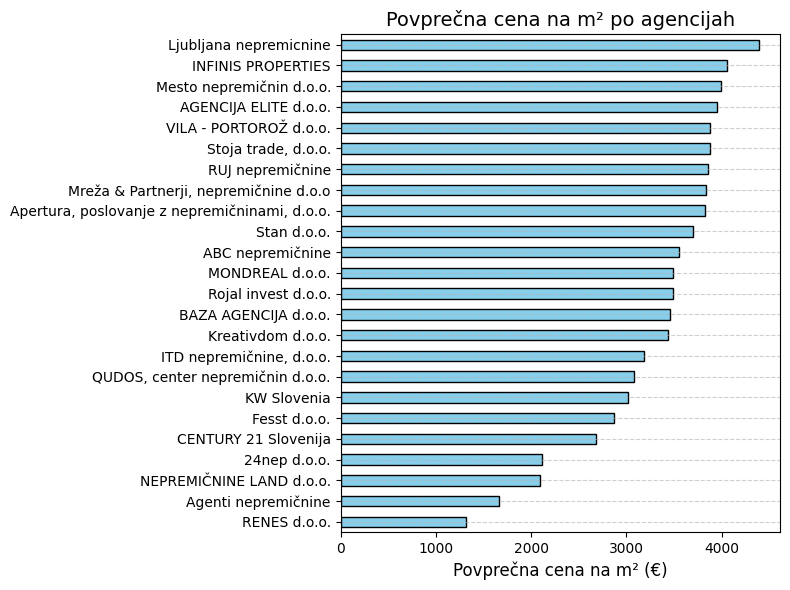

In [213]:
avg_price_per_agency = filtered_df.groupby('prodajalec_agencija')['cena_na_m2'].mean()

# Sortiramo po številu oglasov (kot prej)
# avg_price_per_agency = avg_price_per_agency.loc[reversed(ordered_agencies)]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

avg_price_per_agency.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Povprečna cena na m² po agencijah', fontsize=14)
plt.ylabel("")
plt.xlabel('Povprečna cena na m² (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Renes še vedno ON TOP. Večinoma sicer delajo na Goriškem - Ajdovščina, Nova Gorica, Tolmin, in sicer stare hiše.

## nepremicnine.net

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nepremicnine_df = pd.read_csv('../data/nepremicnine/nepremicnine_prodaja.csv', sep=",")
nepremicnine_df

,url,name,short_description,type,administrative_unit,region,attributes,seller,municipality,forwarding,price,description,id
0,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, ENKR...","AJDOVŠČINA, ENKRATNA LOKACIJA NAD AJDOVŠČINO, ...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Atrij':...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,456000.0,Stanovanje B3-1 Klasična zasnova s sodobnim pr...,6854874
1,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 4-sobno: AJDOVŠČINA, MIRN...","AJDOVŠČINA, MIRNA LOKACIJA NAD AJDOVŠČINO, 105...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 3, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,392160.0,Stanovanje A1-6 Klasična zasnova s sodobnim pr...,6854873
2,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, PRED...","AJDOVŠČINA, PREDEL ŠTURJE, 81,8 m2, 3-sobno, n...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,320460.0,Stanovanje B2-6 Klasična zasnova s sodobnim pr...,6924490
3,https://www.nepremicnine.net/oglasi-prodaja/aj...,"Prodaja, stanovanje, 3-sobno: AJDOVŠČINA, ŠTUR...","AJDOVŠČINA, ŠTURJE NAD AJDOVŠČINO. V PRIHODU, ...",Stanovanje,Ajdovščina,S.Primorska,"{'Št. spalnic': 2, 'Št. kopalnic': 1, 'Parkirn...",BRN Real Estate Agency d.o.o.,Ajdovščina,Prodaja,353260.0,Stanovanje B1-5 Klasična zasnova s sodobnim pr...,6875688
4,https://www.nepremicnine.net/oglasi-prodaja/an...,"Prodaja, hiša, dvojček: ANKARAN, 132.3 m2","ANKARAN, 132,3 m2, dvojček, zgrajen l. 2007, 2...",Hiša,Koper,J. Primorska,{'Polno opremljeno': True},ABC nepremičnine d.o.o.,Ankaran,Prodaja,588000.0,"ANKARAN, Kolomban, parcela 207m2, stanovanjska...",6970917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63847,75000.0,Žužemberk,https://www.nepremicnine.net/oglasi-prodaja/zu...,Prodaja,Dolenjska,"Hiša obsega kletne prostore, pritličje in mans...",Hiša,"ŽUŽEMBERK, LOPATA, 125 m2, samostojna, zgrajen...",Novo mesto,"Nepremičnine Prijatelj, svetovanje in nepremič...","{'Velikost': 125.0, 'Nadstropje': 'K+P+M', 'Št...",6852630,"Prodaja, hiša, samostojna: ŽUŽEMBERK, LOPATA, ..."
63848,490000.0,Tinjan,https://www.nepremicnine.net/oglasi-prodaja/zu...,Prodaja,Istrska,"Na prodaj je čudovita vila v gradnji, ki se na...",Hiša,"ŽUŽIĆI, 156 m2, samostojna, adaptirana l. 2025...",NaN,NO.1 REAL ESTATE Ltd,"{'Velikost': 156.0, 'Št. spalnic': 3, 'Bazen':...",6933500,"Prodaja, hiša, samostojna: ŽUŽIĆI, 156 m2"
63849,74000.0,Tinjan,https://www.nepremicnine.net/oglasi-prodaja/zu...,Prodaja,Istrska,"Na relaciji Poreč-Pazin, v mestecu Tinjan, se ...",Posest,"ŽUŽIĆI, 842 m2, zazidljiva, prodamo. Cena: 74....",NaN,NO.1 REAL ESTATE Ltd,{'Zemljišče': '842 m'},6802297,"Prodaja, posest, zazidljiva: ŽUŽIĆI, 842 m2"
63850,29990.0,Ormož,https://www.nepremicnine.net/oglasi-prodaja/zv...,Prodaja,Podravska,Sredi idilične panonske pokrajine obdane z vin...,Hiša,"ŽVAB, 33 m2, samostojna, zgrajena l. 1800, 3.9...",Ormož,Jeruzalem Ormož SAT d.o.o.,"{'Velikost': 33.0, 'Št. spalnic': 1, 'Shramba'...",6591330,"Prodaja, hiša, samostojna: ŽVAB, 33 m2"


In [215]:
municipalities = {'Ankaran': 'Obalno - kraška', 'Divača': 'Obalno - kraška', 'Hrpelje - Kozina': 'Obalno - kraška', 'Izola': 'Obalno - kraška', 'Komen': 'Obalno - kraška', 'Koper': 'Obalno - kraška', 'Piran': 'Obalno - kraška', 'Sežana': 'Obalno - kraška', 'Ajdovščina': 'Goriška', 'Bovec': 'Goriška', 'Brda': 'Goriška', 'Cerkno': 'Goriška', 'Idrija': 'Goriška', 'Kanal': 'Goriška', 'Kanal ob Soči': 'Goriška', 'Kobarid': 'Goriška', 'Miren - Kostanjevica': 'Goriška', 'Nova Gorica': 'Goriška', 'Renče - Vogrsko': 'Goriška', 'Šempeter - Vrtojba': 'Goriška', 'Tolmin': 'Goriška', 'Vipava': 'Goriška', 'Bled': 'Gorenjska', 'Bohinj': 'Gorenjska', 'Cerklje na Gorenjskem': 'Gorenjska', 'Gorenja vas - Poljane': 'Gorenjska', 'Gorje': 'Gorenjska', 'Jesenice': 'Gorenjska', 'Jezersko': 'Gorenjska', 'Kranj': 'Gorenjska', 'Kranjska Gora': 'Gorenjska', 'Naklo': 'Gorenjska', 'Preddvor': 'Gorenjska', 'Radovljica': 'Gorenjska', 'Šenčur': 'Gorenjska', 'Škofja Loka': 'Gorenjska', 'Tržič': 'Gorenjska', 'Železniki': 'Gorenjska', 'Žiri': 'Gorenjska', 'Žirovnica': 'Gorenjska', 'Borovnica': 'Osrednjeslovenska', 'Brezovica': 'Osrednjeslovenska', 'Dobrepolje': 'Osrednjeslovenska', 'Dobrova - Polhov Gradec': 'Osrednjeslovenska', 'Dol pri Ljubljani': 'Osrednjeslovenska', 'Domžale': 'Osrednjeslovenska', 'Grosuplje': 'Osrednjeslovenska', 'Horjul': 'Osrednjeslovenska', 'Ig': 'Osrednjeslovenska', 'Ivančna Gorica': 'Osrednjeslovenska', 'Kamnik': 'Osrednjeslovenska', 'Komenda': 'Osrednjeslovenska', 'Ljubljana': 'Osrednjeslovenska', 'Log - Dragomer': 'Osrednjeslovenska', 'Logatec': 'Osrednjeslovenska', 'Lukovica': 'Osrednjeslovenska', 'Medvode': 'Osrednjeslovenska', 'Mengeš': 'Osrednjeslovenska', 'Moravče': 'Osrednjeslovenska', 'Škofljica': 'Osrednjeslovenska', 'Šmartno pri Litiji': 'Osrednjeslovenska', 'Trzin': 'Osrednjeslovenska', 'Velike Lašče': 'Osrednjeslovenska', 'Vodice': 'Osrednjeslovenska', 'Vrhnika': 'Osrednjeslovenska', 'Bloke': 'Primorsko - notranjska', 'Cerknica': 'Primorsko - notranjska', 'Ilirska Bistrica': 'Primorsko - notranjska', 'Loška dolina': 'Primorsko - notranjska', 'Pivka': 'Primorsko - notranjska', 'Postojna': 'Primorsko - notranjska', 'Črnomelj': 'Jugovzhodna Slovenija', 'Dolenjske Toplice': 'Jugovzhodna Slovenija', 'Kočevje': 'Jugovzhodna Slovenija', 'Kostel': 'Jugovzhodna Slovenija', 'Loški Potok': 'Jugovzhodna Slovenija', 'Metlika': 'Jugovzhodna Slovenija', 'Mirna': 'Jugovzhodna Slovenija', 'Mirna Peč': 'Jugovzhodna Slovenija', 'Mokronog - Trebelno': 'Jugovzhodna Slovenija', 'Novo mesto': 'Jugovzhodna Slovenija', 'Osilnica': 'Jugovzhodna Slovenija', 'Ribnica': 'Jugovzhodna Slovenija', 'Semič': 'Jugovzhodna Slovenija', 'Sodražica': 'Jugovzhodna Slovenija', 'Straža': 'Jugovzhodna Slovenija', 'Šentjernej': 'Jugovzhodna Slovenija', 'Šentrupert': 'Jugovzhodna Slovenija', 'Škocjan': 'Jugovzhodna Slovenija', 'Šmarješke Toplice': 'Jugovzhodna Slovenija', 'Trebnje': 'Jugovzhodna Slovenija', 'Žužemberk': 'Jugovzhodna Slovenija', 'Bistrica ob Sotli': 'Posavska', 'Brežice': 'Posavska', 'Kostanjevica na Krki': 'Posavska', 'Krško': 'Posavska', 'Radeče': 'Posavska', 'Sevnica': 'Posavska', 'Hrastnik': 'Zasavska', 'Litija': 'Zasavska', 'Trbovlje': 'Zasavska', 'Zagorje ob Savi': 'Zasavska', 'Braslovče': 'Savinjska', 'Celje': 'Savinjska', 'Dobje': 'Savinjska', 'Dobrna': 'Savinjska', 'Gornji Grad': 'Savinjska', 'Kozje': 'Savinjska', 'Laško': 'Savinjska', 'Ljubno': 'Savinjska', 'Luče': 'Savinjska', 'Mozirje': 'Savinjska', 'Nazarje': 'Savinjska', 'Podčetrtek': 'Savinjska', 'Polzela': 'Savinjska', 'Prebold': 'Savinjska', 'Rečica ob Savinji': 'Savinjska', 'Rogaška Slatina': 'Savinjska', 'Rogatec': 'Savinjska', 'Slovenske Konjice': 'Savinjska', 'Solčava': 'Savinjska', 'Šentjur': 'Savinjska', 'Šmarje pri Jelšah': 'Savinjska', 'Šmartno ob Paki': 'Savinjska', 'Šoštanj': 'Savinjska', 'Štore': 'Savinjska', 'Tabor': 'Savinjska', 'Velenje': 'Savinjska', 'Vitanje': 'Savinjska', 'Vojnik': 'Savinjska', 'Vransko': 'Savinjska', 'Zreče': 'Savinjska', 'Žalec': 'Savinjska', 'Črna na Koroškem': 'Koroška', 'Dravograd': 'Koroška', 'Mežica': 'Koroška', 'Mislinja': 'Koroška', 'Muta': 'Koroška', 'Podvelka': 'Koroška', 'Prevalje': 'Koroška', 'Radlje ob Dravi': 'Koroška', 'Ravne na Koroškem': 'Koroška', 'Ribnica na Pohorju': 'Koroška', 'Slovenj Gradec': 'Koroška', 'Vuzenica': 'Koroška', 'Benedikt': 'Podravska', 'Cerkvenjak': 'Podravska', 'Cirkulane': 'Podravska', 'Destrnik': 'Podravska', 'Dornava': 'Podravska', 'Duplek': 'Podravska', 'Gorišnica': 'Podravska', 'Hajdina': 'Podravska', 'Hoče - Slivnica': 'Podravska', 'Juršinci': 'Podravska', 'Kidričevo': 'Podravska', 'Kungota': 'Podravska', 'Lenart': 'Podravska', 'Lovrenc na Pohorju': 'Podravska', 'Majšperk': 'Podravska', 'Makole': 'Podravska', 'Maribor': 'Podravska', 'Markovci': 'Podravska', 'Miklavž na Dravskem polju': 'Podravska', 'Oplotnica': 'Podravska', 'Ormož': 'Podravska', 'Pesnica': 'Podravska', 'Podlehnik': 'Podravska', 'Poljčane': 'Podravska', 'Ptuj': 'Podravska', 'Rače - Fram': 'Podravska', 'Ruše': 'Podravska', 'Selnica ob Dravi': 'Podravska', 'Slovenska Bistrica': 'Podravska', 'Središče ob Dravi': 'Podravska', 'Starše': 'Podravska', 'Sveta Ana': 'Podravska', 'Sveta Trojica v Slovenskih goricah': 'Podravska', 'Sveti Andraž v Slovenskih goricah': 'Podravska', 'Sveti Jurij v Slovenskih goricah': 'Podravska', 'Sveti Tomaž': 'Podravska', 'Šentilj': 'Podravska', 'Trnovska vas': 'Podravska', 'Videm': 'Podravska', 'Zavrč': 'Podravska', 'Žetale': 'Podravska', 'Apače': 'Pomurska', 'Beltinci': 'Pomurska', 'Cankova': 'Pomurska', 'Črenšovci': 'Pomurska', 'Dobrovnik': 'Pomurska', 'Gornja Radgona': 'Pomurska', 'Gornji Petrovci': 'Pomurska', 'Grad': 'Pomurska', 'Hodoš': 'Pomurska', 'Kobilje': 'Pomurska', 'Križevci': 'Pomurska', 'Kuzma': 'Pomurska', 'Lendava': 'Pomurska', 'Ljutomer': 'Pomurska', 'Moravske Toplice': 'Pomurska', 'Murska Sobota': 'Pomurska', 'Odranci': 'Pomurska', 'Puconci': 'Pomurska', 'Radenci': 'Pomurska', 'Razkrižje': 'Pomurska', 'Rogašovci': 'Pomurska', 'Sveti Jurij ob Ščavnici': 'Pomurska', 'Šalovci': 'Pomurska', 'Tišina': 'Pomurska', 'Turnišče': 'Pomurska', 'Velika Polana': 'Pomurska', 'Veržej': 'Pomurska'}

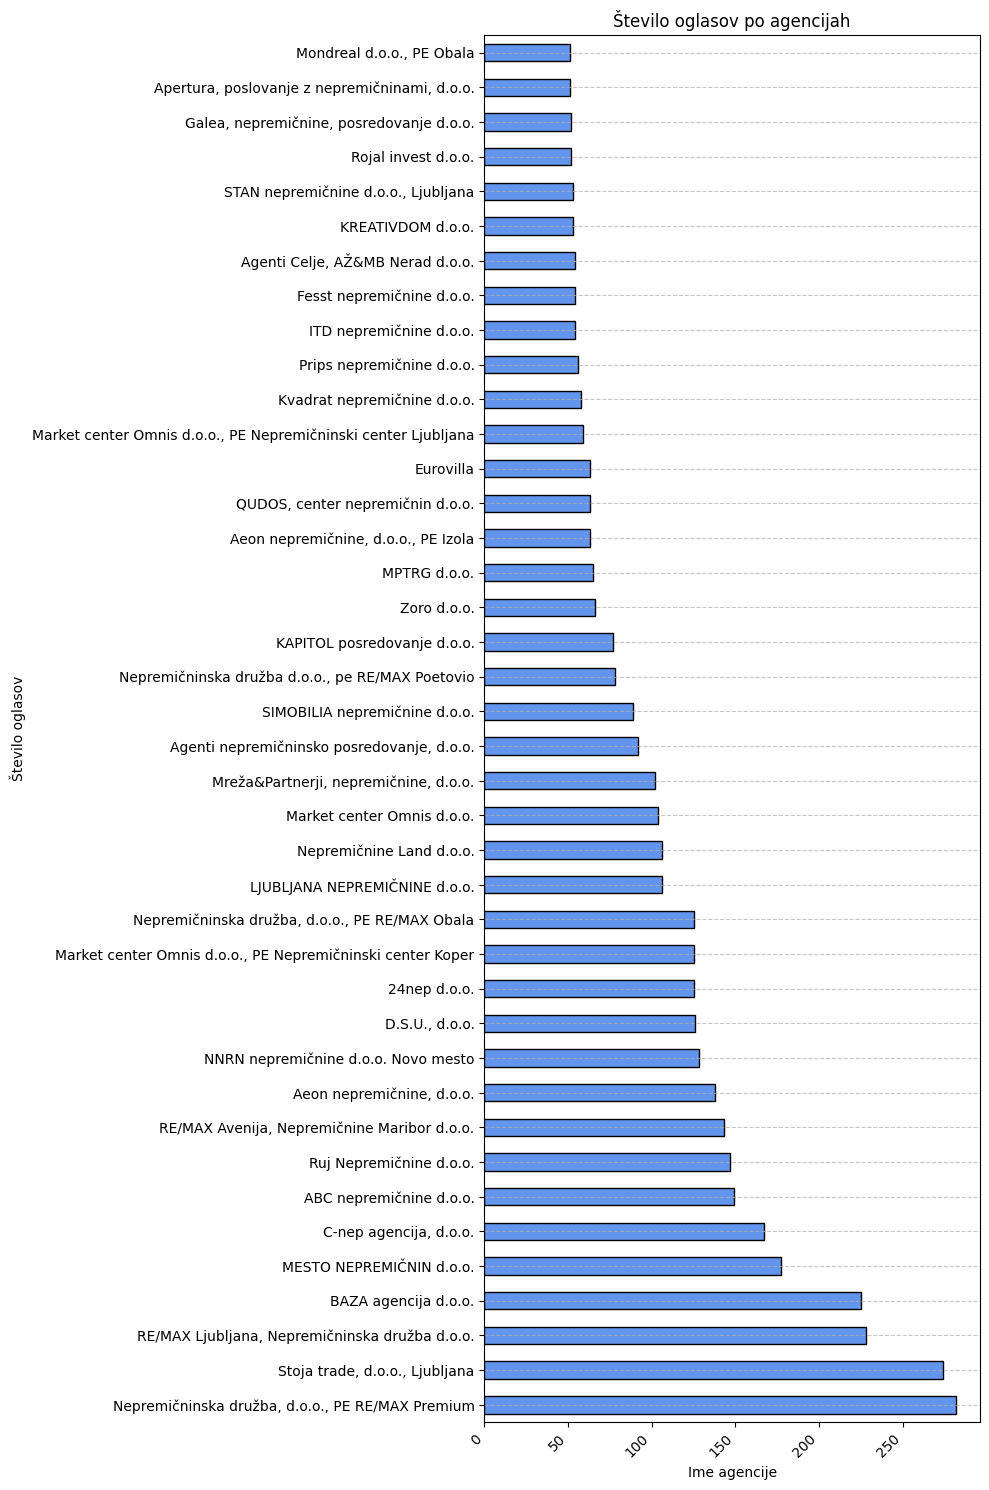

In [216]:
nepremicnine_df2 = nepremicnine_df.copy()
# nepremicnine_df2 = nepremicnine_df2[nepremicnine_df2['seller'].str.contains('century', case=False, na=False)]
# nepremicnine_df2.groupby('region').agg(mcounts=('region', 'count'))
nepremicnine_df2 = nepremicnine_df2[nepremicnine_df2['seller'] != 'ZASEBNA PONUDBA']
nepremicnine_df2 = nepremicnine_df2[nepremicnine_df2['municipality'].isin(municipalities.keys())]
counts = nepremicnine_df2['seller'].value_counts()
counts = counts[counts >= 50]

# # Nariši stolpični diagram
plt.figure(figsize=(10, 15))
counts.plot(kind='barh', color='cornflowerblue', edgecolor='black', )

plt.title('Število oglasov po agencijah')
plt.xlabel('Ime agencije')
plt.ylabel('Število oglasov')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/8m/dfvs5qws4vldqrmk1w928rq80000gn/T/ipykernel_70797/46747833.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


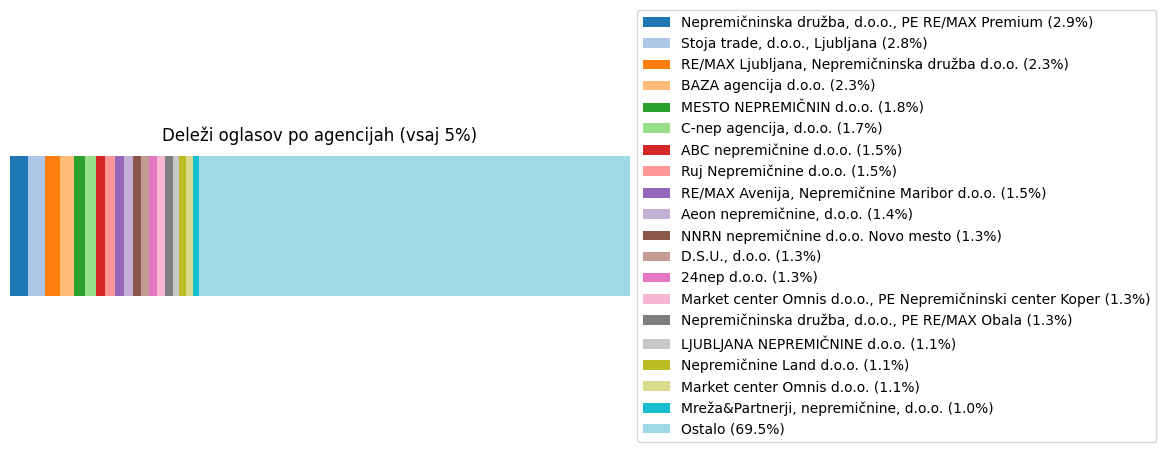

In [217]:
import matplotlib.pyplot as plt


# Preštej vrednosti
counts = nepremicnine_df2['seller'].value_counts()

# Pretvori v deleže
proportions = counts / counts.sum()

# Agencije >= 5%
main_agencije = proportions[proportions >= 0.01]

# Združi ostale
ostalo = proportions[proportions < 0.01].sum()

# Dodaj 'Ostalo' k rezultatu
stack_data = main_agencije.copy()
stack_data['Ostalo'] = ostalo

# Pripravimo barve
colors = plt.cm.tab20.colors

# Pripravimo sliko
fig, ax = plt.subplots(figsize=(8, 2))  # Visok 1 stolpec

# Nariši "stolpec po stolpec"
left = 0
for i, (label, value) in enumerate(stack_data.items()):
    ax.barh(y=0, width=value, left=left, color=colors[i % len(colors)], label=f'{label} ({value:.1%})')
    left += value  # zamik za naslednji segment

# Stilizacija
ax.set_xlim(0, 1)
ax.set_title('Deleži oglasov po agencijah (vsaj 5%)')
ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [242]:
# Step 1: Filter rows where 'seller' contains 're/max' (case-insensitive)
nepremicnine_df2['seller'] = nepremicnine_df2['seller'].replace(
    to_replace=r'.*RE/MAX.*', 
    value='RE/MAX Nepremičninska družba d.o.o.', 
    # case=False, 
    regex=True
)
remax_hs_df = nepremicnine_df2[(nepremicnine_df2['seller'].str.contains('re/max', case=False, na=False)) &
                 (nepremicnine_df2['type'].isin(["Hiša", "Stanovanje"]))
                 ]
remax_hs_df = remax_hs_df.copy()
remax_hs_df['size'] = remax_hs_df['name'].str.extract(r'(\d+(?:\.\d+)?)\s*m2').astype(float)
remax_hs_df['price'] = pd.to_numeric(remax_hs_df['price'], errors='coerce')
remax_hs_df["price_per_m2"] = remax_hs_df["price"] / remax_hs_df['size']
remax_hs_df

# remax_df = nepremicnine_df2[nepremicnine_df2['seller'].str.contains('re/max', case=False, na=False)]

# # Step 2: Create a new DataFrame with the same columns as kvadrati_df, filled with empty values
new_rows = pd.DataFrame('', index=remax_hs_df.index, columns=kvadrati_df.columns)

# # Step 3: Add the 'seller' values to the new column 'prodajalec_agencija'
new_rows['prodajalec_agencija'] = remax_hs_df['seller']
new_rows['cena_na_m2'] = remax_hs_df['price_per_m2']

# # Step 4: Append the new rows to kvadrati_df
kvadrati_df2 = kvadrati_df.copy()
kvadrati_df2 = pd.concat([kvadrati_df2, new_rows], ignore_index=True)
kvadrati_df2


,id,naslov,latitude,longitude,vrsta_prodaje,vrsta,tip,velikost,leto_gradnje,cena,prodajalec_oseba,prodajalec_agencija,splosno,znacilnosti,opis,url,velikost_clean,cena_clean,cena_na_m2
0,1,"Notranjsko - kraška, Ilirska Bistrica, Hrušica",45.846179,14.230267,Prodaja,Parcela,Zazidljiva,4194 m2,NaN,37.000 €,Nina Hudnik,RONI NEPREMIČNINE d.o.o.,Šifra:=PP397815031525,NaN,Iščete primerno zemljišče za gradnjo ali inves...,https://mojikvadrati.com/nepremicnina/467410-p...,4194.0,37000.0,8.822127
1,2,"Pomurska, Murska Sobota",46.662464,16.165526,Prodaja,Parcela,Zazidljiva,1898 m2,NaN,40 €/m2,Rajko Šimonka,Prips nepremičnine d.o.o.,Šifra:=P26-2022,NaN,Nedaleč od trgovskega središča prodamo zemljiš...,https://mojikvadrati.com/nepremicnina/373458-p...,1898.0,NaN,NaN
2,3,"Podravska, Destrnik, Vintarovci",46.495602,15.864561,Prodaja,Parcela,Zazidljiva,646 m2,NaN,23.500 €,Melanija Raišp,CENTURY 21 Slovenija,Šifra:=100104-589,Lega=Jug/Zahod|Luksuz=Lep razgled/Bližina nara...,"ZEMLJIŠČE V VINTAROVCIH, DESTRNIKProdamo zemlj...",https://mojikvadrati.com/nepremicnina/453310-p...,646.0,23500.0,36.377709
3,4,"Goriška, Kanal ob Soči, Doblar",46.115738,13.68729,Prodaja,Hiša,Samostojna,223.6 m2,1924.0,110.000 €,Jure Repše,RENES d.o.o.,Parcela:=17967 m2|Zgrajeno:=1924|Ener. izk.=G|...,Dodatno=Balkon/Atrij/Terasa,DOBLARSamostojna stanovanjska hiša velikosti 2...,https://mojikvadrati.com/nepremicnina/424445-p...,223.6,110000.0,491.949911
4,5,"Podravska, Maribor, Pekre",46.543337,15.592553,Prodaja,Hiša,Večstanovanjska,322.6 m2,1973.0,579.000 €,Barbara Pečenik,BAZA AGENCIJA d.o.o.,Velikost (bruto):=322.6 m2|Parcela:=535 m2|Št....,Ogrevanje=Toplotna črpalka|Luksuz=Klima/Lep ra...,Na odlični in mirni lokaciji v Pekrah prodamo ...,https://mojikvadrati.com/nepremicnina/469054-p...,322.6,579000.0,1794.792312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,788.146280
7184,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,2056.098816
7185,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,1513.809524
7186,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,2305.555556


/var/folders/8m/dfvs5qws4vldqrmk1w928rq80000gn/T/ipykernel_70797/2655424238.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


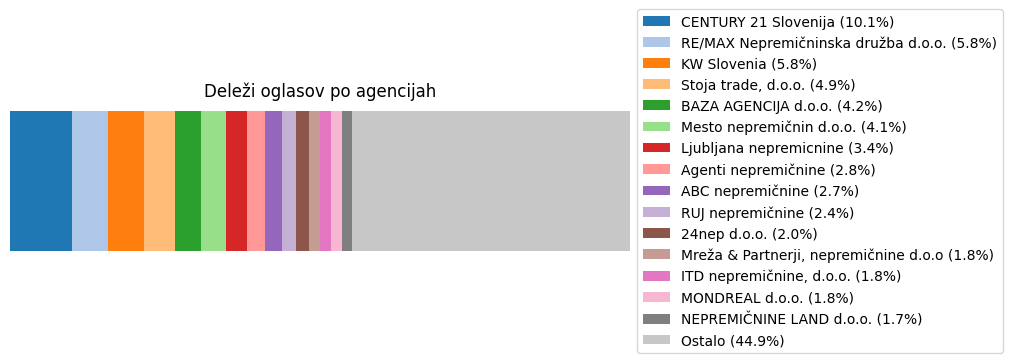

In [246]:
import matplotlib.pyplot as plt

# Preštej vrednosti
counts = kvadrati_df2['prodajalec_agencija'].value_counts()

# Pretvori v deleže
proportions = counts / counts.sum()

# Agencije >= 5%
main_agencije = proportions[proportions >= 0.015]

# Združi ostale
ostalo = proportions[proportions < 0.015].sum()

# Dodaj 'Ostalo' k rezultatu
stack_data = main_agencije.copy()
stack_data['Ostalo'] = ostalo

# Pripravimo barve
colors = plt.cm.tab20.colors

# Pripravimo sliko
fig, ax = plt.subplots(figsize=(8, 2))  # Visok 1 stolpec

# Nariši "stolpec po stolpec"
left = 0
for i, (label, value) in enumerate(stack_data.items()):
    ax.barh(y=0, width=value, left=left, color=colors[i % len(colors)], label=f'{label} ({value:.1%})')
    left += value  # zamik za naslednji segment

# Stilizacija
ax.set_xlim(0, 1)
ax.set_title('Deleži oglasov po agencijah')
ax.axis('off')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [247]:
kvadrati_cene2 = kvadrati_df2[(kvadrati_df2['cena_na_m2'].notnull()) & (kvadrati_df2['cena_na_m2'] < 15000) & (kvadrati_df2['cena_na_m2'] > 50)]
kvadrati_cene2

,id,naslov,latitude,longitude,vrsta_prodaje,vrsta,tip,velikost,leto_gradnje,cena,prodajalec_oseba,prodajalec_agencija,splosno,znacilnosti,opis,url,velikost_clean,cena_clean,cena_na_m2
3,4,"Goriška, Kanal ob Soči, Doblar",46.115738,13.68729,Prodaja,Hiša,Samostojna,223.6 m2,1924.0,110.000 €,Jure Repše,RENES d.o.o.,Parcela:=17967 m2|Zgrajeno:=1924|Ener. izk.=G|...,Dodatno=Balkon/Atrij/Terasa,DOBLARSamostojna stanovanjska hiša velikosti 2...,https://mojikvadrati.com/nepremicnina/424445-p...,223.6,110000.0,491.949911
4,5,"Podravska, Maribor, Pekre",46.543337,15.592553,Prodaja,Hiša,Večstanovanjska,322.6 m2,1973.0,579.000 €,Barbara Pečenik,BAZA AGENCIJA d.o.o.,Velikost (bruto):=322.6 m2|Parcela:=535 m2|Št....,Ogrevanje=Toplotna črpalka|Luksuz=Klima/Lep ra...,Na odlični in mirni lokaciji v Pekrah prodamo ...,https://mojikvadrati.com/nepremicnina/469054-p...,322.6,579000.0,1794.792312
6,7,"Ljubljana okolica, Velike Lašče",45.832469,14.63831,Prodaja,Parcela,Zazidljiva,925 m2,NaN,110.000 €,NaN,Bamba nepremičnine Tanko Franc s.p.,NaN,NaN,"VELIKE LAŠČEVELIKE LAŠČE- center, prodamo stav...",https://mojikvadrati.com/nepremicnina/469046-p...,925.0,110000.0,118.918919
7,8,"Ljubljana okolica, Škofljica",45.985384,14.572855,Prodaja,Hiša,Samostojna,142 m2,2024.0,585.000 €,Rojal invest d.o.o.,Rojal invest d.o.o.,Velikost (bruto):=142 m2|Parcela:=599 m2|Zgraj...,NaN,ŠKOFLJICA – NOVOGRADNJA – SAMOSTOJNE HIŠEŠKOFL...,https://mojikvadrati.com/nepremicnina/449826-p...,142.0,585000.0,4119.718310
8,9,"Ljubljana, Vič-Rudnik, Trnovo",43.672248,18.448815,Prodaja,Hiša,Dvojček,217 m2,2020.0,864.000 €,NIKO MAUČEC,Mesto nepremičnin d.o.o.,Velikost (neto):=217 m2|Velikost (bruto):=217 ...,Dodatno=Vrt/Terasa/Pokrito parkirišče|Priključ...,"Hiša dvojček v Trnovskem predmestju(P+1, novog...",https://mojikvadrati.com/nepremicnina/247131-p...,217.0,864000.0,3981.566820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,788.146280
7184,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,2056.098816
7185,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,1513.809524
7186,,,,,,,,,,,,RE/MAX Nepremičninska družba d.o.o.,,,,,,,2305.555556


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = kvadrati_df2['prodajalec_agencija'].value_counts()

# Izberi samo agencije z vsaj 45 vrsticami
valid_agencies = counts[counts >= 45].sort_values().index

# Filtriraj DataFrame, da vsebuje le validne agencije
filtered_df = kvadrati_df2[(kvadrati_df2['prodajalec_agencija'].isin(valid_agencies))]
filtered_df = filtered_df[(kvadrati_df2["vrsta"] == "Stanovanje") | (kvadrati_df2["vrsta"] == "Hiša") | (kvadrati_df2["prodajalec_agencija"].str.contains("RE/MAX"))]

ordered_agencies = counts[counts >= 45].sort_values(ascending=False).index

mean_values = filtered_df.groupby('prodajalec_agencija')['cena_na_m2'].mean().loc[ordered_agencies]


# Ustvari scatter plot za filtrirane in sortirane agencije
plt.figure(figsize=(12, 6))

sns.stripplot(
    data=filtered_df,
    y='prodajalec_agencija',
    x='cena_na_m2',
    order=ordered_agencies,
    alpha=0.7,
    hue='prodajalec_agencija',
    palette='Set2', 
    legend=None
)
sns.scatterplot(
    y=ordered_agencies,
    x=mean_values.values,
    color='r',
    marker='o',
    s=50,
    zorder=10,
    label="Povprečje"
)

plt.title('Cene na m² za prodajalce', fontsize=14)
plt.xlabel('Agencija', fontsize=12)
plt.ylabel('Cena na m² (€)', fontsize=12)
plt.tight_layout()

plt.show()